<a href="https://colab.research.google.com/github/ziwon-hwang/DDWU_Outlier/blob/main/outlier7%EC%A1%B0_%EC%9C%A4%EC%84%9D%EC%97%B4%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 크롤링 테스트

In [1]:
import os
import sys
import urllib.request

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 함수로 정의 / txt 파일로 저장

import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

# 크롤링 실습

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 불필요한 내용 제거

In [5]:
data=pd.read_csv("/content/drive/MyDrive/outlier/윤석열.csv")
#data=data['comment']
data

,tweet,date,retweets_count,link
0,윤석열 나경원 김태호 인성 덜 된 자들의 헤쳐모여는 파국으로 치닫을 것 상식과 공정...,2021-11-22,0,https://twitter.com/Mesmerizingway/status/1462...
1,티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선...,2021-11-22,0,https://twitter.com/songsun21/status/146277414...
2,그걸 윤석열 지지로 읽으니까 무식하다는 소리를 하지 그리고 니네들 한심한 거 맞잖아,2021-11-22,0,https://twitter.com/coervos/status/14627741373...
3,민주당은 국힘당 대변인 김병민을 허위사실 유포로 즉각 고발해야 가짜 영수증으로 윤석...,2021-11-22,0,https://twitter.com/dalsoo7/status/14627741300...
4,날씨 차진다 이럴 때는 따끈한 오뎅에 떡볶이가 최고죠 건 그거고 티비조선에서 윤석열...,2021-11-22,0,https://twitter.com/RGbVaZ8bF5oodRN/status/146...
...,...,...,...,...
27938,단독 윤석열도 별장에서 수차례 접대 검찰 윤중천 진술 덮었다 다음 뉴스 CHfoG...,2021-11-13,0,https://twitter.com/28n8yj14FcwFI6F/status/145...
27939,zynyemom jacquelinekim88 탄핵이 그렇게 쉽게 이뤄지는게 아니에...,2021-11-13,0,https://twitter.com/Sunny38251/status/14595242...
27940,윤석열 하는 헛소리를 듣다 보면 번역기가 필요하긴 하다 박근혜가 남자목소리 흉내내 ...,2021-11-13,0,https://twitter.com/parutia/status/14595239972...
27941,윤석열은 김대중 오부치 회담 배경의 비밀을 알고 있다 RJBPN5QxjM,2021-11-13,5,https://twitter.com/hispidbike/status/14595228...


In [6]:
# 한글과 띄어쓰기만 추출
import re
result=[]
hangul = re.compile('[^ ㄱ-ㅣ가-힣+]')
#hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')

for i in range(len(data)):
  result.append(hangul.sub('', data['tweet'][i])) 
result

['윤석열 나경원 김태호 인성 덜 된 자들의 헤쳐모여는 파국으로 치닫을 것 상식과 공정이 아닌 사기와 공작의 향연 국민의힘 게이트 ',
 '티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열티비조선윤석열',
 '그걸 윤석열 지지로 읽으니까 무식하다는 소리를 하지 그리고 니네들 한심한 거 맞잖아 ',
 '민주당은 국힘당 대변인 김병민을 허위사실 유포로 즉각 고발해야 가짜 영수증으로 윤석열의 선거법 위반 혐의를 숨기려 한다 강력 응징해야 사기꾼 김병민을 즉각 고발해야 ',
 '날씨 차진다 이럴 때는 따끈한 오뎅에 떡볶이가 최고죠 건 그거고 티비조선에서 윤석열의 침묵을 보며 발끈해와 최순실이 오버랩 되는게 내 오버일까 아니 그럼 당선되면 준비해준 질문만 받고 구명조끼를 왜 안입었죠 라고 하며 추악한 이교도에게 속아 손에 자를 새기고 국정을 운영하려고요 ',
 '박근혜대통령이 머리에 든것이 없다보니 토론을 기피했다는데 이번엔 윤석열이네 대망신 대본 프롬터 안 뜨니 입도 못 떼는 윤석열 후보 대선 후보 맞습니까 무려 분 동안 두리번두리번 국제포럼 영어 연설도 아닌데 우리 말도 못합니까 국정 생각이 머리 속에 들어 있습니까 사퇴하라 ',
 '수준이 그것 밖에 안되는거지 영상 윤석열 국제포럼 연설서 분 침묵 해프닝 잠시 무대준비 출처 이데일리 네이버 뉴스 ',
 '윤석열 침묵 방송사고 일파만파 다음 뉴스  방송 초 벗어나면 방송 사고라 던데 그 긴긴 짬동안 묵상했나 왕을 위해',
 '윤석열 선대위에 특공조직 윤희숙이 이끄는 이재명 저격팀만든다 ',
 ' 기레기들 국민은 개돼지 취급 국민의힘은 경선 흥행 민주당은 흥행 실패 근거는 대검의 윤석열 사건 강압수사처럼 보도 형광등 개 아우라 떠올리는 윤석열 광주방문 무지개 기자들 공개적으로 윤석열 지지성 메시지 ',
 '  윤석열 아웃 ',
 '

In [7]:
for k in range(len(result)):
  result[k]=result[k].replace('\n',' ')
  result[k]=result[k].replace('\t',' ')

# 불필요한 내용 제거
   

In [8]:
#result_split = result.split('포스팅 내용')
#result_split[1]
#result_split
result[0]

'윤석열 나경원 김태호 인성 덜 된 자들의 헤쳐모여는 파국으로 치닫을 것 상식과 공정이 아닌 사기와 공작의 향연 국민의힘 게이트 '

In [9]:
file = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt',"w", encoding='utf-8')
file.write(str(result))
file.close()

# 형태소 분석

In [10]:
data_split = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt', 'r', encoding='utf-8').read()
data_split = [[data_split,1]]
print(data_split)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 54.9 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [12]:
from konlpy.tag import Okt

okt = Okt()

def tokenize(doc):
    return [t for t in okt.pos(doc, norm=True, stem=True)]      # norm은 정규화, stem은 근어로 표시

tokenize_docs = [(tokenize(row[0]), row[1]) for row in data_split]

with open('/content/drive/MyDrive/Colab Notebooks/tokenized_data', 'w', encoding="utf-8") as make_file:     # JSON 파일로 저장
    json.dump(tokenize_docs, make_file, ensure_ascii=False, indent="\t")
tokenize_docs[0]

([("['", 'Punctuation'),
  ('윤석열', 'Noun'),
  ('나경원', 'Noun'),
  ('김태호', 'Noun'),
  ('인성', 'Noun'),
  ('덜', 'Noun'),
  ('되다', 'Verb'),
  ('자', 'Noun'),
  ('들', 'Suffix'),
  ('의', 'Josa'),
  ('헤치다', 'Verb'),
  ('모이다', 'Verb'),
  ('파국', 'Noun'),
  ('으로', 'Josa'),
  ('치닫다', 'Verb'),
  ('것', 'Noun'),
  ('상식', 'Noun'),
  ('과', 'Josa'),
  ('공정', 'Noun'),
  ('이', 'Josa'),
  ('아니다', 'Adjective'),
  ('사기', 'Noun'),
  ('와', 'Josa'),
  ('공작', 'Noun'),
  ('의', 'Josa'),
  ('향연', 'Noun'),
  ('국민', 'Noun'),
  ('의', 'Josa'),
  ('힘', 'Noun'),
  ('게이트', 'Noun'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선', 'Noun'),
  ('윤석열', 'Noun'),
  ('티비조선',

# 워드클라우드

In [13]:
# 빈도수 세기

from collections import Counter
counter = Counter(tokenize_docs[0][0])
count_words = sorted(counter.items(), key=lambda x:-x[1])
count_words

[(('윤석열', 'Noun'), 31779),
 (("',", 'Punctuation'), 27942),
 (("'", 'Punctuation'), 27942),
 (('하다', 'Verb'), 24069),
 (('이', 'Josa'), 16853),
 (('을', 'Josa'), 12297),
 (('의', 'Josa'), 11877),
 (('에', 'Josa'), 10393),
 (('은', 'Josa'), 10363),
 (('이재명', 'Noun'), 10037),
 (('가', 'Josa'), 8631),
 (('들', 'Suffix'), 8424),
 (('를', 'Josa'), 6095),
 (('는', 'Josa'), 6076),
 (('후보', 'Noun'), 5935),
 (('되다', 'Verb'), 5846),
 (('도', 'Josa'), 5429),
 (('있다', 'Adjective'), 5216),
 (('뉴스', 'Noun'), 4713),
 (('과', 'Josa'), 4283),
 (('것', 'Noun'), 4259),
 (('없다', 'Adjective'), 4004),
 (('국민', 'Noun'), 3989),
 (('으로', 'Josa'), 3986),
 (('로', 'Josa'), 3332),
 (('대통령', 'Noun'), 3227),
 (('보다', 'Verb'), 2978),
 (('민주당', 'Noun'), 2947),
 (('한', 'Josa'), 2937),
 (('다음', 'Noun'), 2931),
 (('아니다', 'Adjective'), 2807),
 (('대선', 'Noun'), 2631),
 (('에서', 'Josa'), 2487),
 (('수사', 'Noun'), 2414),
 (('김건희', 'Noun'), 2342),
 (('출처', 'Noun'), 2114),
 (('이다', 'Josa'), 2102),
 (('말', 'Noun'), 2098),
 (('않다', 'Verb'), 2

In [14]:
# 명사만 추출
noun_count = {x[0][0]:x[1] for x in count_words if x[0][1]=='Noun' and len(x[0][0])>=2 and '동덕' not in x[0][0]}
noun_count

{'윤석열': 31779,
 '이재명': 10037,
 '후보': 5935,
 '뉴스': 4713,
 '국민': 3989,
 '대통령': 3227,
 '민주당': 2947,
 '다음': 2931,
 '대선': 2631,
 '수사': 2414,
 '김건희': 2342,
 '출처': 2114,
 '검찰': 1957,
 '사람': 1797,
 '김종인': 1667,
 '지지율': 1467,
 '의혹': 1458,
 '장모': 1400,
 '홍준표': 1284,
 '언론': 1241,
 '대장동': 1212,
 '지지': 1209,
 '생각': 1172,
 '네이버': 1145,
 '정치': 1127,
 '문재인': 1069,
 '종부세': 1061,
 '대위': 1054,
 '특검': 983,
 '이낙연': 978,
 '교체': 968,
 '일본': 919,
 '정권': 913,
 '침묵': 908,
 '사건': 870,
 '나라': 845,
 '단독': 838,
 '지금': 834,
 '정부': 834,
 '구속': 825,
 '이준석': 818,
 '주가조작': 817,
 '안철수': 803,
 '박근혜': 802,
 '검사': 800,
 '대한민국': 794,
 '우리': 788,
 '국힘': 786,
 '고발': 740,
 '선거': 725,
 '이유': 721,
 '비리': 718,
 '문제': 713,
 '김한길': 700,
 '여론조사': 683,
 '부인': 680,
 '한국': 659,
 '때문': 649,
 '하나': 637,
 '의원': 635,
 '조국': 627,
 '새끼': 618,
 '야당': 614,
 '진짜': 611,
 '사과': 610,
 '지지자': 600,
 '관련': 594,
 '기자': 588,
 '대한': 584,
 '가족': 571,
 '사실': 567,
 '도이치': 561,
 '인간': 555,
 '위해': 548,
 '정책': 546,
 '부동산': 540,
 '대결': 538,
 '폭탄주': 536,
 '캠프': 

In [15]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fm._rebuild()
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = " + fontInfo.fname)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquare

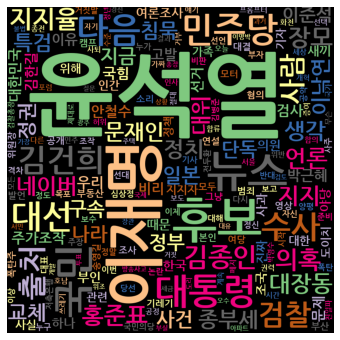

In [18]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'   # 원하는 폰트 지정

wordcloud = WordCloud(
    max_words=200, #최대 수용 단어 갯수
    background_color='black', #배경색상
    font_path=font_path,
    width = 800, #넓이
    height = 800, #길이
    colormap='Accent_r')
    
wordcloud.generate_from_frequencies(dict(noun_count))

fig =  plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/word_cloud.jpg')